In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [4]:


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


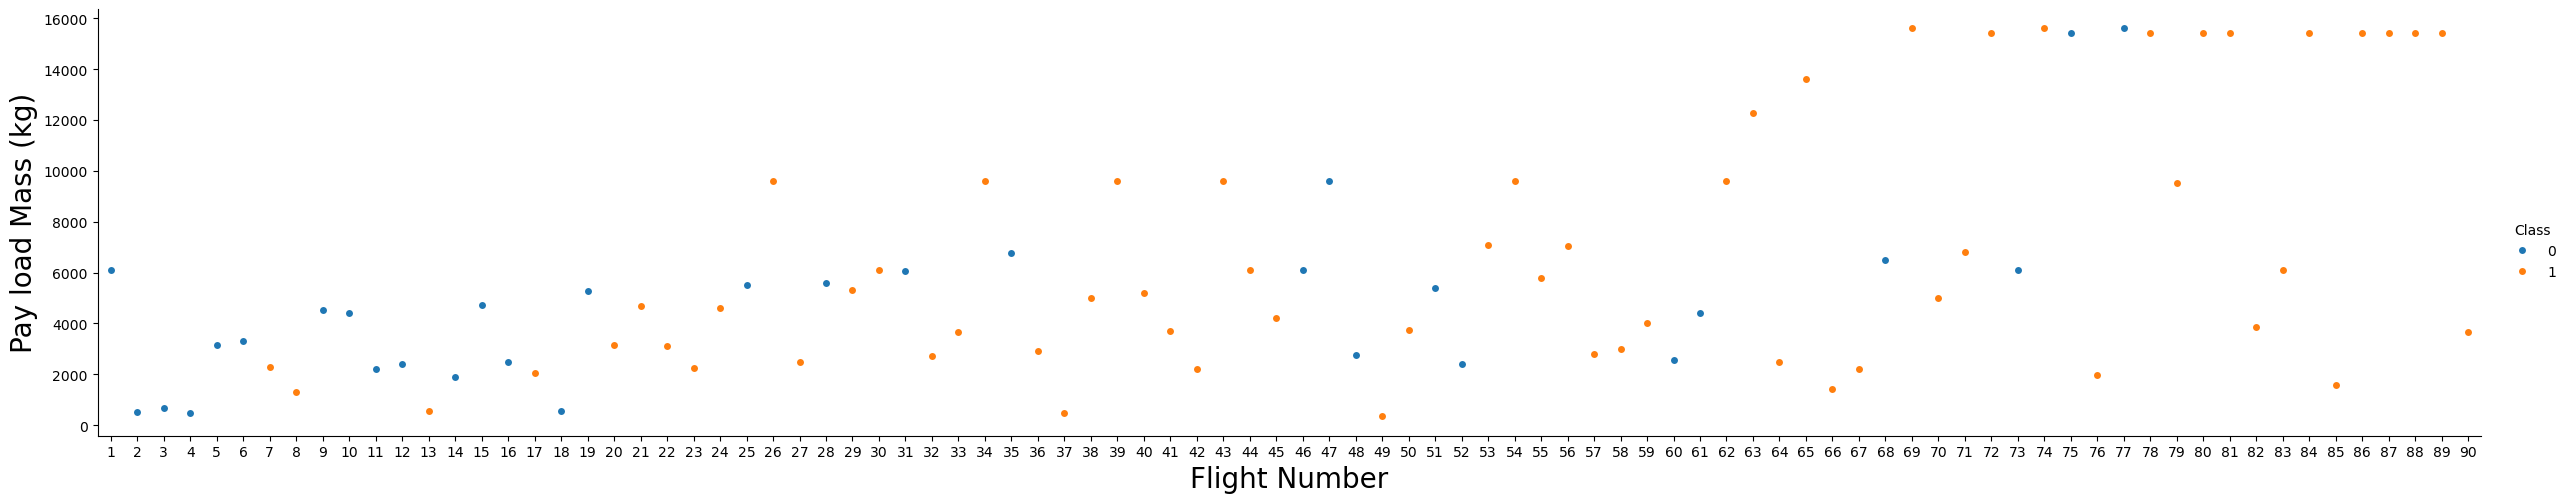

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

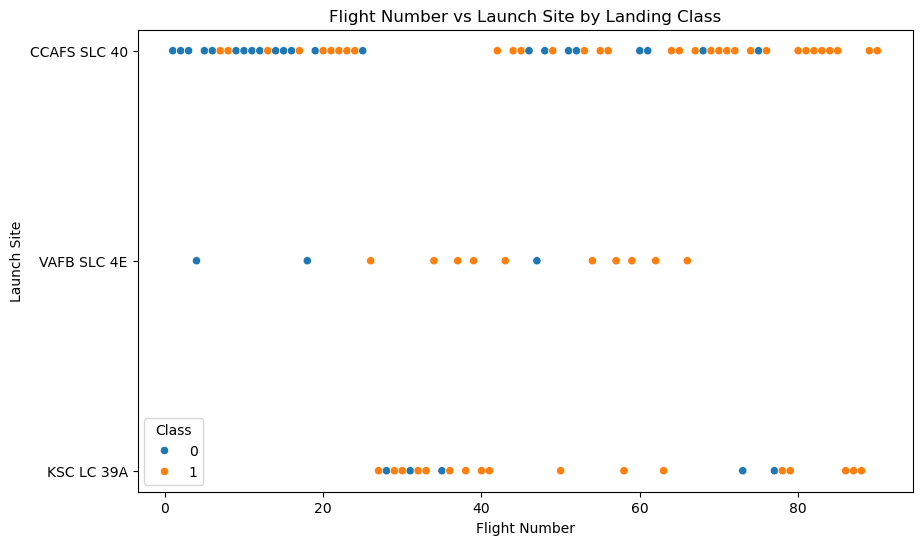

In [6]:
## Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class',)

# Add title and labels
plt.title('Flight Number vs Launch Site by Landing Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

# Show the plot
plt.show()

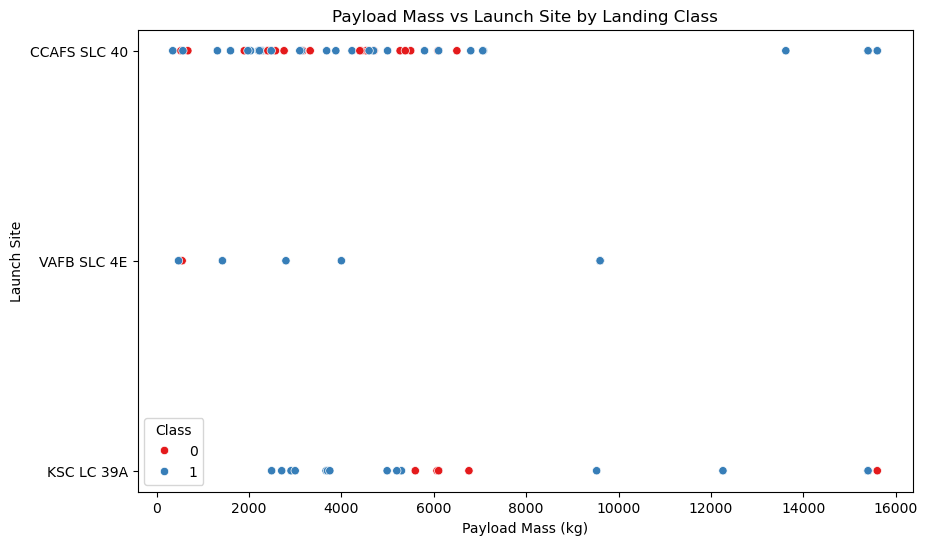

In [8]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='Set1')

# Add title and labels
plt.title('Payload Mass vs Launch Site by Landing Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')

# Show the plot
plt.show()

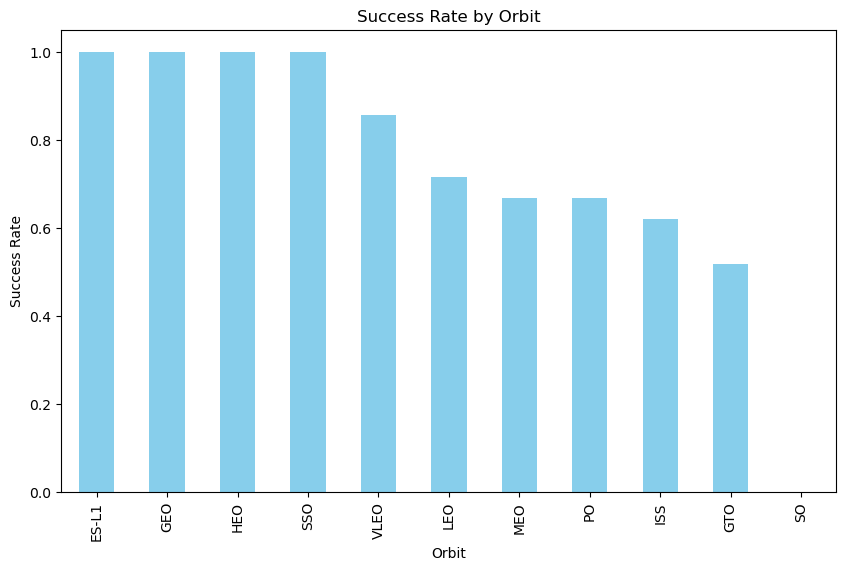

In [9]:
#bar chart for the sucess rate of each orbit
# Group by Orbit and calculate the mean success rate
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
orbit_success.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Success Rate by Orbit')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')

# Show the plot
plt.show()

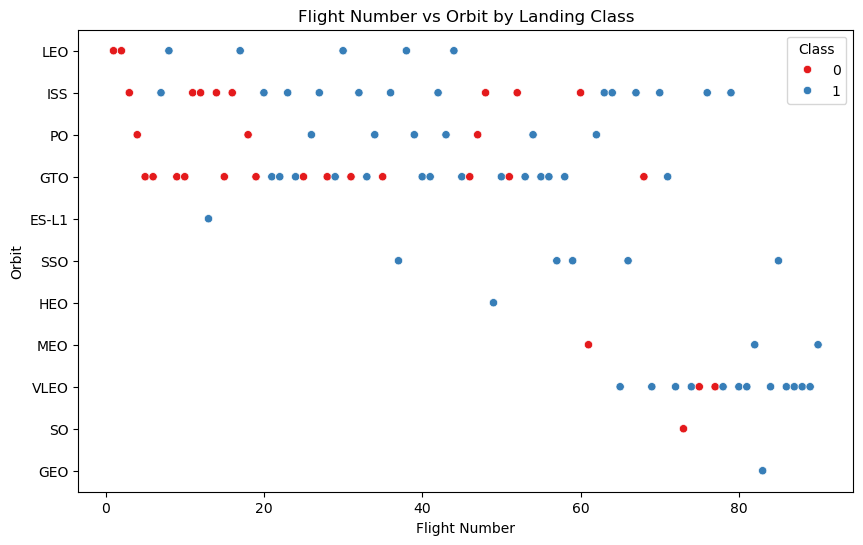

In [10]:
## Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='Set1')

# Add title and axis labels
plt.title('Flight Number vs Orbit by Landing Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')

# Show the plot
plt.show()

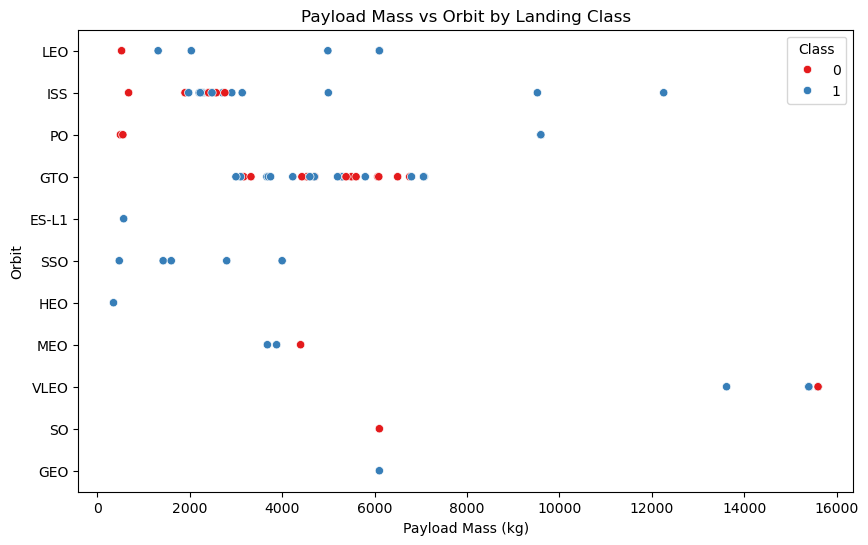

In [11]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='Set1')

# Add title and labels
plt.title('Payload Mass vs Orbit by Landing Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show the plot
plt.show()

In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


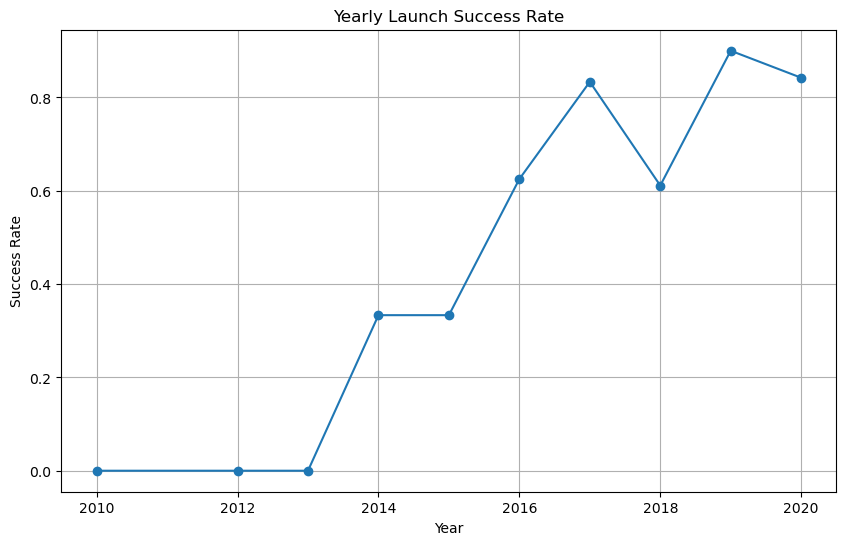

In [13]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year into a new column
df['Year'] = df['Date'].dt.year

# Group by Year and calculate mean success rate
yearly_success = df.groupby('Year')['Class'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_success.index, yearly_success.values, marker='o', linestyle='-')

# Add title and axis labels
plt.title('Yearly Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')

# Show the plot
plt.grid(True)
plt.show()

In [14]:
#we will select the features that will be used in success prediction in the future module.
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
#Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.
# Apply one-hot encoding to selected categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the result
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#Now that our <code>features_one_hotdataframe only contains numbers, cast the entire dataframe to variable type float64
features_one_hot = features_one_hot.astype('float64')

In [17]:
#export csv

features_one_hot.to_csv('dataset_part_3.csv', index=False)